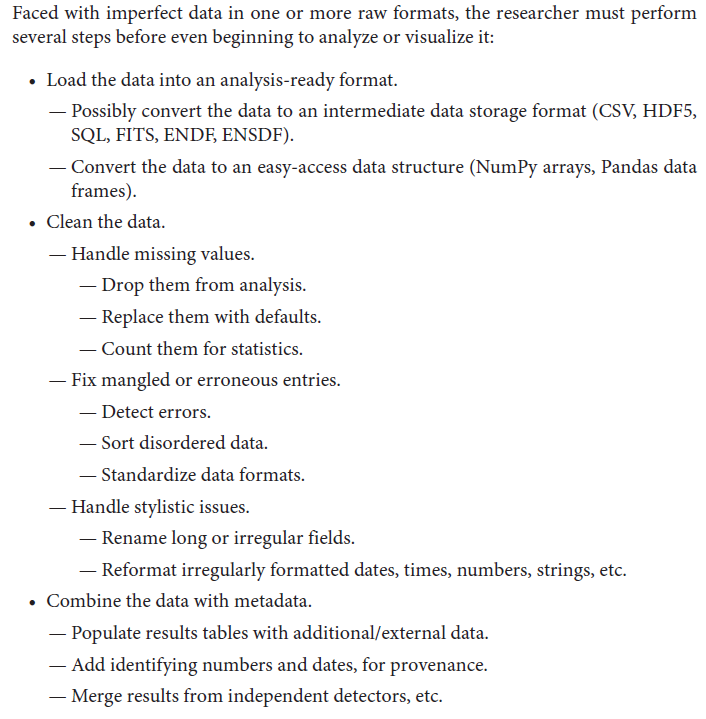


#### Metadata
Metadata is data about data. It is important to include metadata because the results
produced by an experiment or a simulation sometimes fail to capture all of its
features.

In an experiment, detector parameters, the date of the experiment, background radiation
readings from another detector, and more. can all affect the interpretation of
results, but these factors may not have been captured in the experimental data output
stream. They can instead be captured in the metadata.

Metadata is not limited to experimentation, however. Metadata that may affect the
interpretation of the results of a simulation include simulation ID numbers, library
dependency version numbers, input file content, and more.

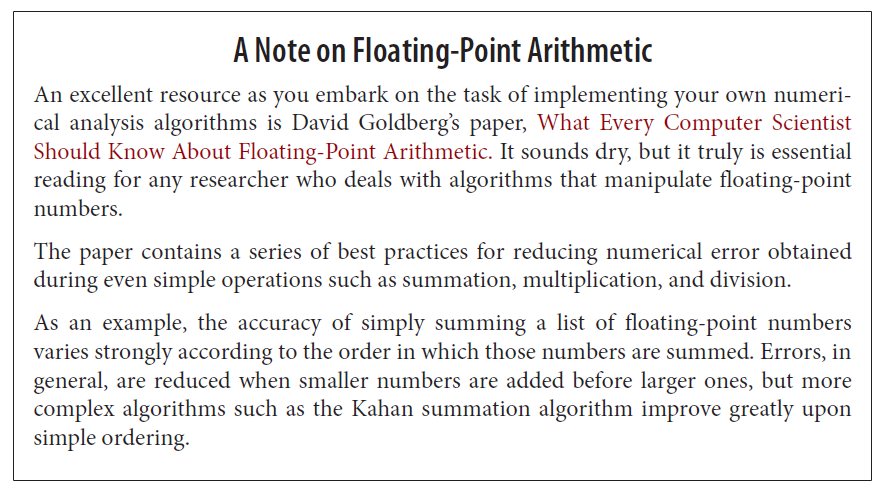

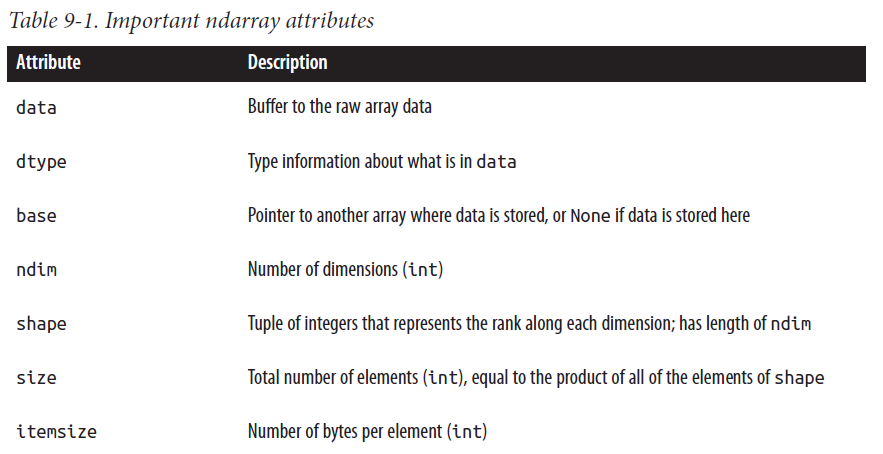

A common method of **reshaping an existing array** is to assign a new tuple of integers
to the shape attribute. This will change the shape in-place. For example:

NumPy also provides a np.reshape() function that you can call with an array argument.
However, this returns a reshaped copy of the original array. This is one of the
central patterns of NumPy: **operations that involve attributes or methods of ndarray
occur in-place, while functions that take an ndarray as an argument return a modified
copy.**

In [1]:
import numpy as np

a = np.arange(4)
a.shape = (2, 2)

a = np.arange(8) #array([0, 1, 2, 3, 4, 5, 6, 7])

a[::-1] #array([7, 6, 5, 4, 3, 2, 1, 0])
a[2:6] #array([2, 3, 4, 5])
a[1::3] #array([1, 4, 7])

## Also note that rows come before columns in NumPy.

a = np.arange(16)

a.shape = (4, 4) #Create a 1D array and reshape it to be 4x4.
# array([[ 0, 1, 2, 3],
#        [ 4, 5, 6, 7],
#        [ 8, 9, 10, 11],
#        [12, 13, 14, 15]])

print('even row - odd col', a[::2, 1::2]) #Slice the even rows and the odd columns.
print('inner 2x2', a[1:3, 1:3])
print('reverse first 3 rows of first 3 col: ',a[2::-1, :3])

"""
The most important feature of array slicing to understand is that slices are views into
the original array. No data is copied when a slice is made, making NumPy especially
fast for slicing operations.
"""

# That slice arrays are views means that modifications to their elements are reflected
# back in the original arrays. This makes sense, as there is only one block of memory
# between them. As a demonstration, if you have two arrays a and b, where b is a slice
# of a, then you can tell that b is a view if its base is a. Furthermore, changes to the
# contents of either a or b will also affect the other array.

a = np.arange(6) #array([0, 1, 2, 3, 4, 5])
b = a[1::2]
b[1] = 42 #array([ 1, 42, 5])
a #array([ 0, 1, 2, 42, 4, 5])
b.base is #true

# If you truly want a copy of a slice of an array, you can always create a new array from
# the slice:
a = np.arange(16)
b = np.array(a[1::11])

# Though this is extremely expressive, it can also be subtly expensive. For each operation,
# a new array is created and all elements are looped over. For simple expressions
# (such as a - 1) this overhead is fine, because the result is typically assigned to a new
# variable name. However, for more complex operations (such as 2*a**2 + 3*a + 1)
# the allocation of new arrays is somewhat wasteful since they are discarded immediately
# after the next operation is completed. Why create a special array for a**2 if it is
# going to be deleted when you finish computing 2*a**2? These ephemeral arrays are
# called temporaries.
a = np.arange(6)
a - 1
a + a
2*a**2 + 3*a + 1

"""
make performance improvements just by doing some algebraic rearrangements to
minimize the total number of operations. As a contrived example, 6*a would run
about twice as fast and use half the memory as the expression 3*(2*a). For more rigorous
and thorough resolution of the temporary issue, please investigate the excellent
numexpr package.
"""

even row - odd col [[ 1  3]
 [ 9 11]]
inner 2x2 [[ 5  6]
 [ 9 10]]
reverse first 3 rows of first 3 col:  [[ 8  9 10]
 [ 4  5  6]
 [ 0  1  2]]


**NumPy is able to broadcast arrays of different shapes
together as long as their shapes follow some simple compatibility rules**. Two shapes
are compatible if:
1. For each axis, the dimensions are equal (a.shape[i] == b.shape[i]), or the dimension of one is 1 (a.shape[i] == 1 or b.shape[i] == 1).
2. The rank (number of dimensions) of one is less than that of the other (a.ndim < i or b.ndim < i).

When
the length of an axis is 1 on array a and the length of the same axis on array b is
greater than 1, the value of a is virtually stretched along the entire length of b in this
dimension. Every element of b sees the value of a for this operation. This is where the
term broadcasting comes from: one element of a goes to all elements of b. Similarly,
for axes of b that are greater than the rank of a, the entire array a is stretched along
the remaining dimensions of b.
**Normal Python multiplication (\*) on arrays is implemented with broadcasting rules.**

In [4]:
a = np.arange(4)
a.shape = (2, 2)
b = np.array([[42], [43]])
print('a cross b: broadcasting', a * b)

# Here, every column of a is multiplied element-wise by the values in b. Notably, this
# does not perform the dot product, which instead requires the aptly named dot()
# function:
print('a dot b: inner product operation', np.dot(a, b))

a cross b: broadcasting [[  0  42]
 [ 86 129]]
a dot b: inner product operation [[ 43]
 [213]]


### Fancy indexing 
is where you index by an integer array or a list of integers, instead of
indexing by a slice or newaxis. The fancy part comes from the following qualities:
• You may provide arbitrary indices.
• You can have repeated indices.
• Indices may be out of order.
• The shape of the index does not need to match the shape of the array.
• The shape of the index may have more or fewer dimensions than the array.
• Indices may be used seamlessly with slices.

In [ ]:
a = 2*np.arange(8)**2 + 1
# pull out the fourth, last, and
# second indices
a[[3, -1, 1]]
# pull out the Fibonacci sequence
fib = np.array([0, 1, 1, 2, 3, 5])
a[fib]
# pull out a 2x2 array
a[[[[2, 7], [4, 2]]]]

a = np.arange(16) - 8
a.shape = (4, 4)
# pull out the third, last, and
# first columns
a[:, [2, -1, 0]]
# pull out a Fibonacci sequence of
# rows for every other column, starting
# from the back
fib = np.array([0, 1, 1, 2, 3])
a[fib, ::-2]

### Masking
A mask is like a fancy index in many respects, except that it must be a Boolean array.
Masks may be used to index other arrays that have the same shape or the same length
along an axis. If the value of the mask at a given location is True, then the value from
the array appears in the result. If the value is False, then the data does not appear. As
with fancy indexing, the application of a mask to an array will produce a copy of the
data, not a view. A mask cannot be a Python list of bools; it must truly be a NumPy
array of bools. Here’s an example using a 3×3 matrix and a one-dimensional.

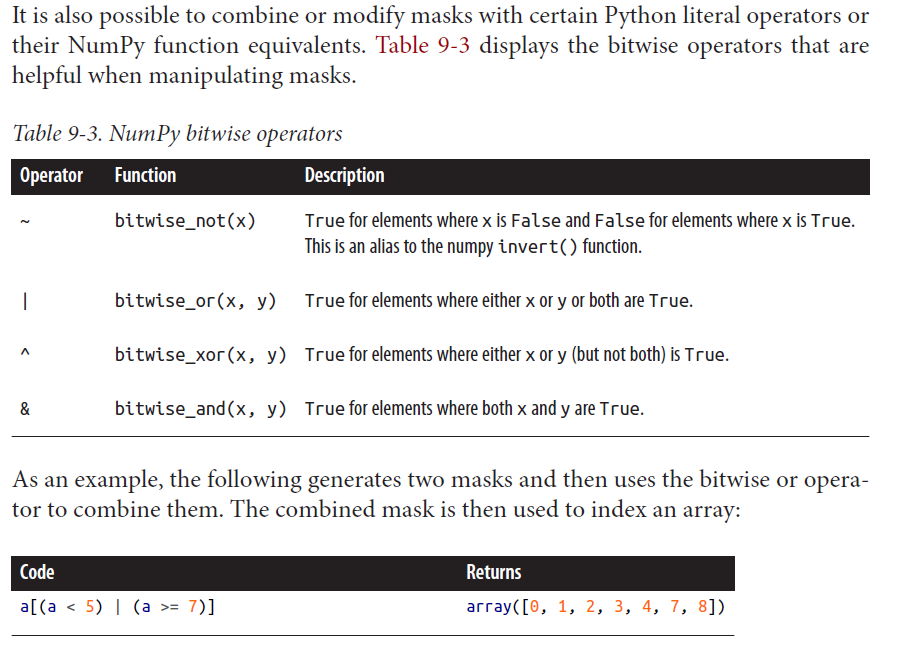

In [11]:
# create an array
a = np.arange(9)
a.shape = (3,3)
print('a:',a)
# create an all True mask
m = np.ones(3, dtype=bool)
print(m)
# take the diagonal
print(a[m, m])

# create a mask
m = np.array([[1, 0, 1],
[False, True, False],
[0, 0, 1]], dtype=bool)

print(a[m])

# What is particularly beautiful about this is that the mask can be generated in the
# indexing operation itself. You can read the following code as "a[i] such that a[i] is
# less than 5 for all i“:

print('less than', a[a < 5])

# Masks can and should be used in conjunction with NumPy’s where() function. If you
# are familiar with the WHERE clause in SQL, this is conceptually similar. This function
# takes a Boolean array and returns a tuple of fancy indices that are the coordinates for
# where the mask is True. This function always returns a tuple so that it can be used in
# an indexing operation itself:

print('np.where',np.where(a < 5))
a[np.where(a >= 7)]

a: [[0 1 2]
 [3 4 5]
 [6 7 8]]
[ True  True  True]
[0 4 8]
[0 2 4 8]
less than [0 1 2 3 4]
np.where (array([0, 0, 0, 1, 1], dtype=int64), array([0, 1, 2, 0, 1], dtype=int64))


array([7, 8])

There are also
two dtype attributes that are only useful in the context of compound dtypes. The
first, **names**, is a tuple of strings that gives the column names and their order. You can
rename columns by resetting this attribute. The second, **fields**, is a dict-like object
that maps the column names to the dtypes. The values in fields are read-only.

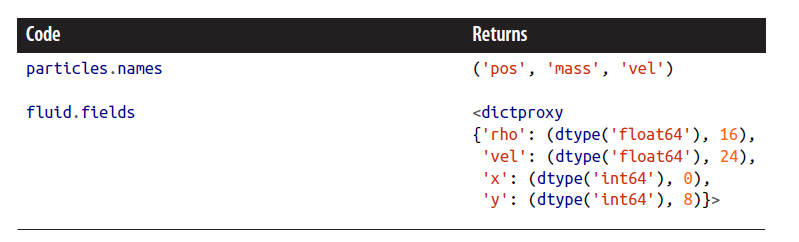

Notice that the lines from a file are always strings. This means that you have to convert
the string versions of the values in matrix into integers yourself. Python doesn’t
know that you mean for the content of the file to be a matrix. In fact, the only
assumption about data types that Python can make is that a file contains strings.
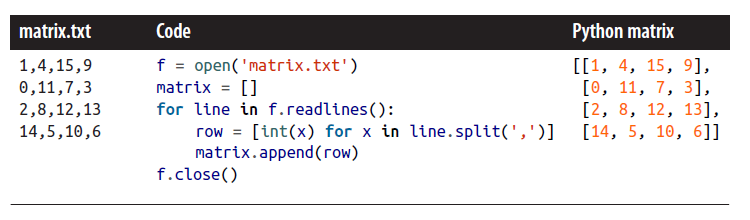

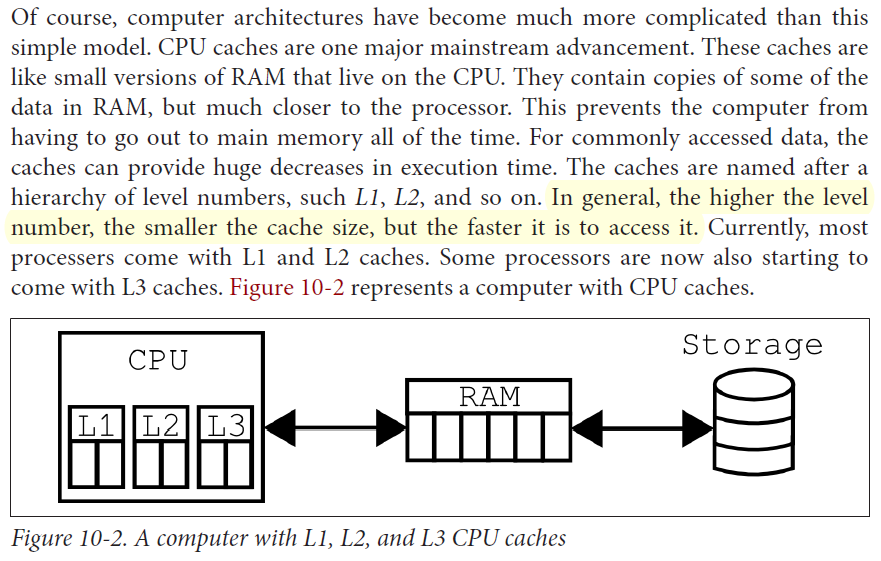

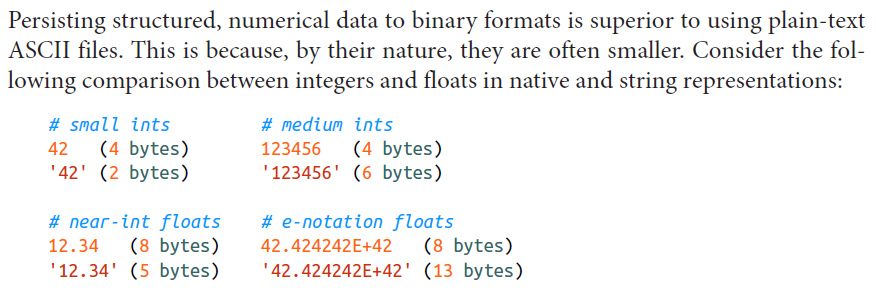

In most cases, the native representation is smaller than the string version. Only by
happenstance are small integers and near-integer floats smaller in their string forms.
Such cases are relatively rare on average, so native formats almost always outperform
the equivalent strings in terms of space.
Space is not the only concern for files. Speed also matters. Binary formats are always
faster for I/O because in order to do real math with the numbers, if they are in a
string form you have to convert them from strings to the native format. The Python
conversion functions int() and float() are known to be relatively slow because the
C conversion functions atoi() and atof() that they wrap around are expensive
themselves.

Still, it is often desirable to have something more than a binary chunk of data in a file.
**HDF5 provides common database features such as the ability to store many datasets,
user-defined metadata, optimized I/O, and the ability to query its contents. Unlike
SQL, where every dataset lives in a single namespace, HDF5 allows datasets to live in
a nested tree structure. In effect, HDF5 is a filesystem within a file—this is where the
“hierarchical” in the name comes from.**

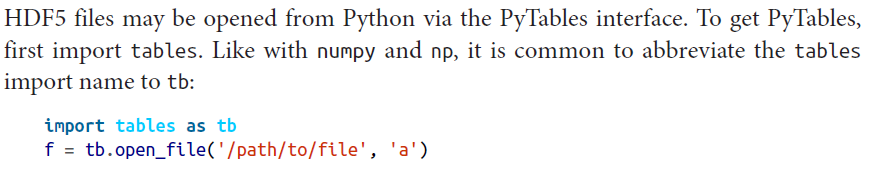

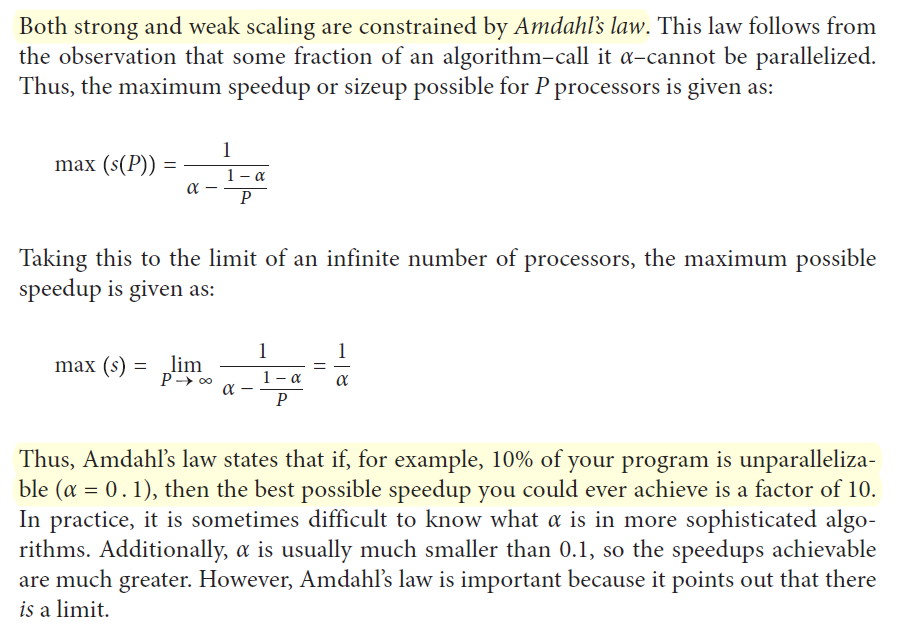

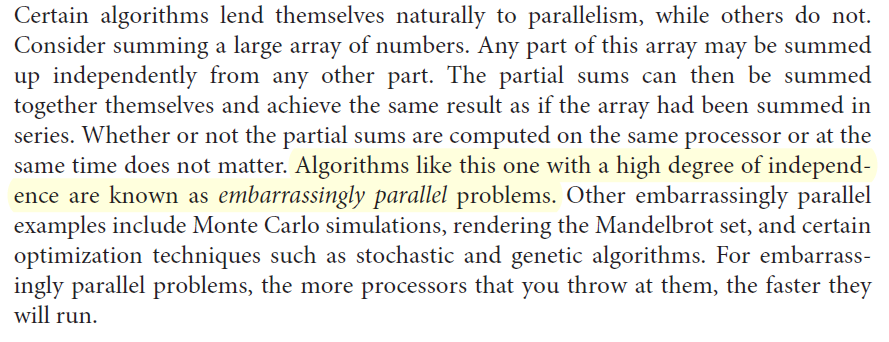

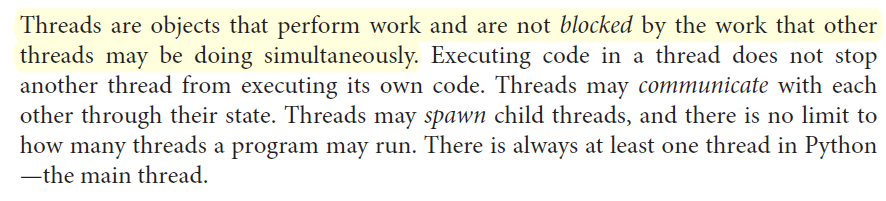

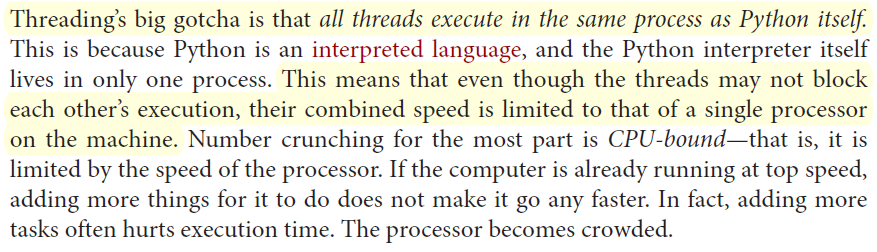

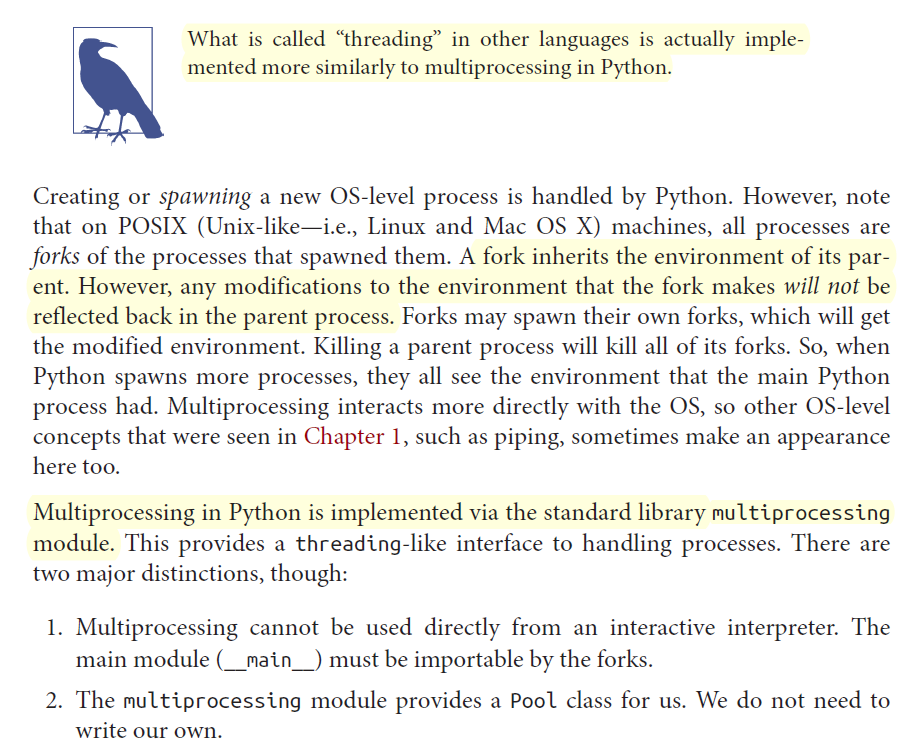

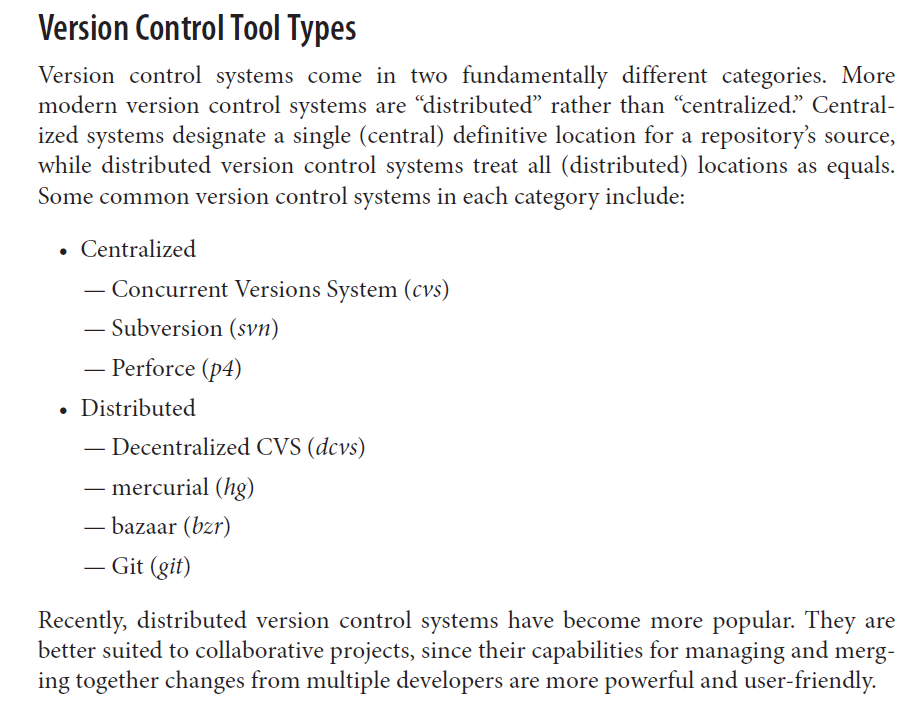

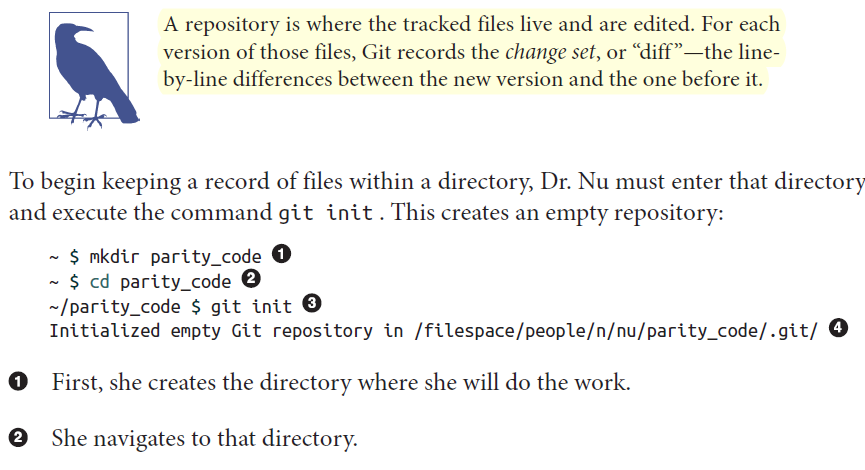

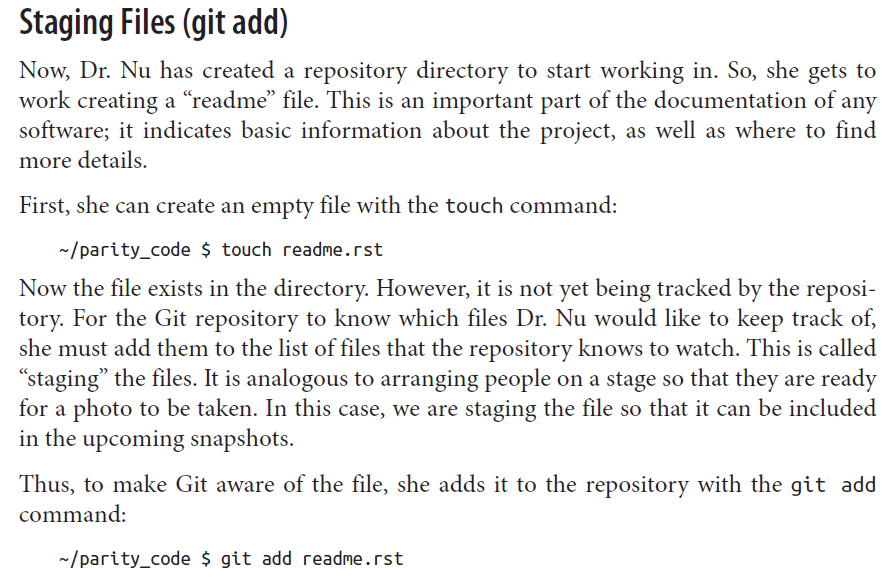

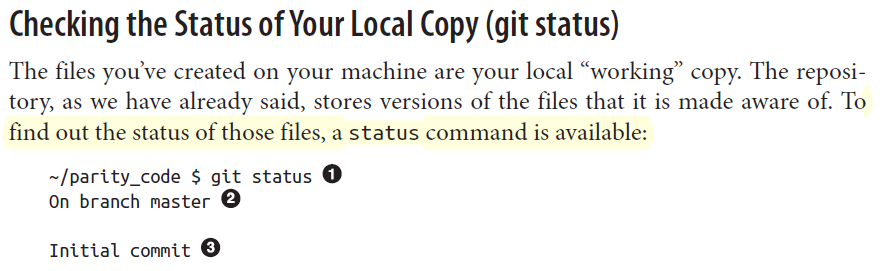

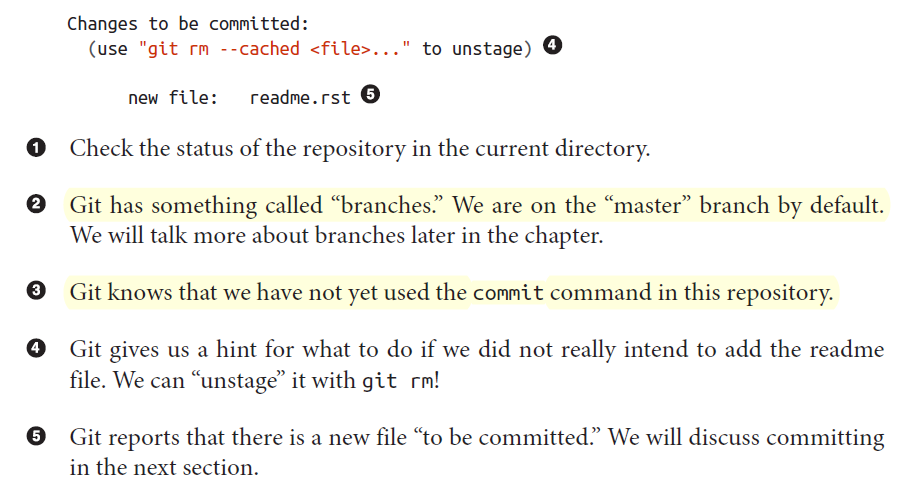

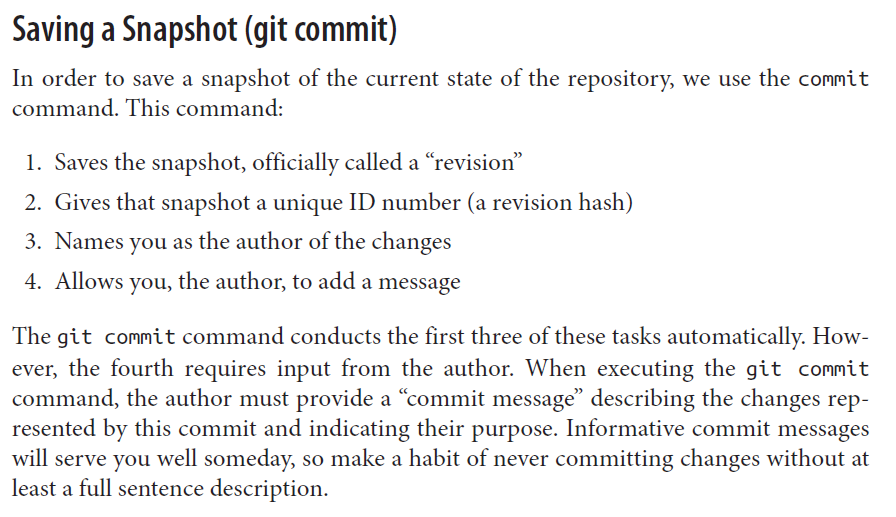

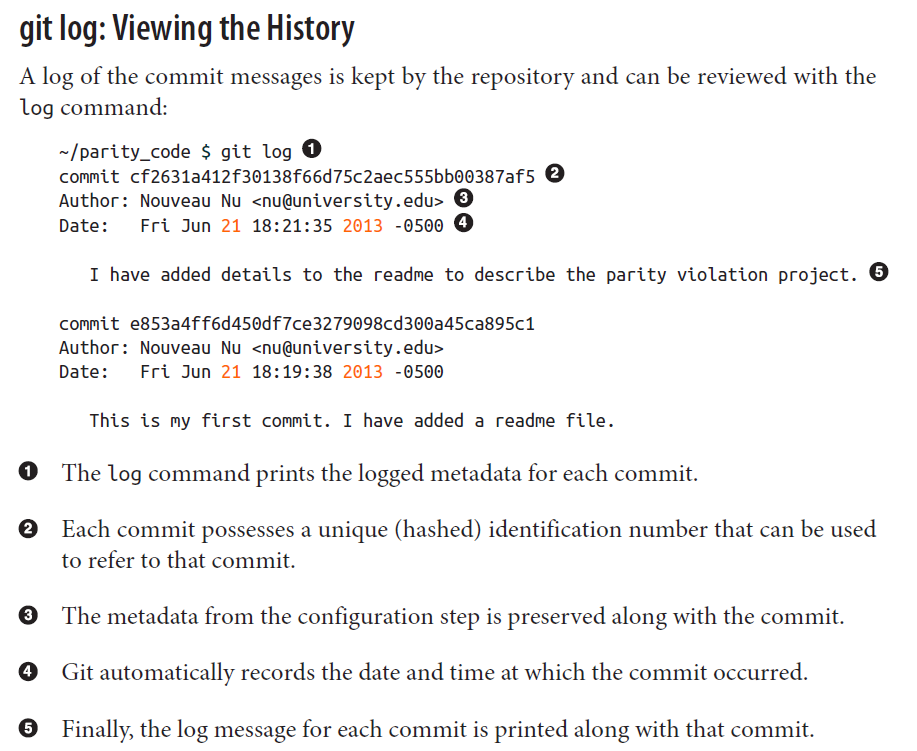

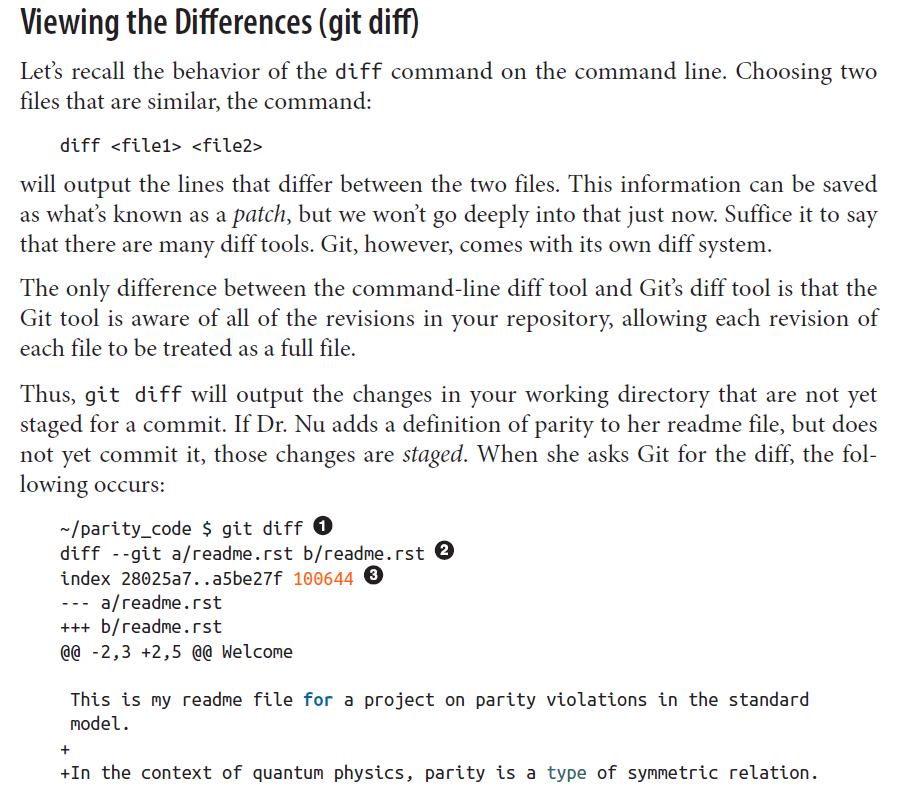

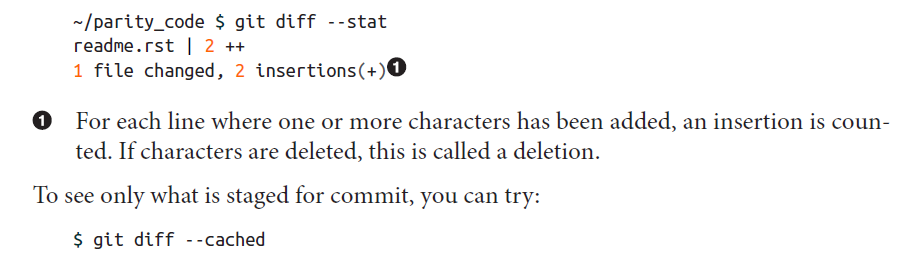

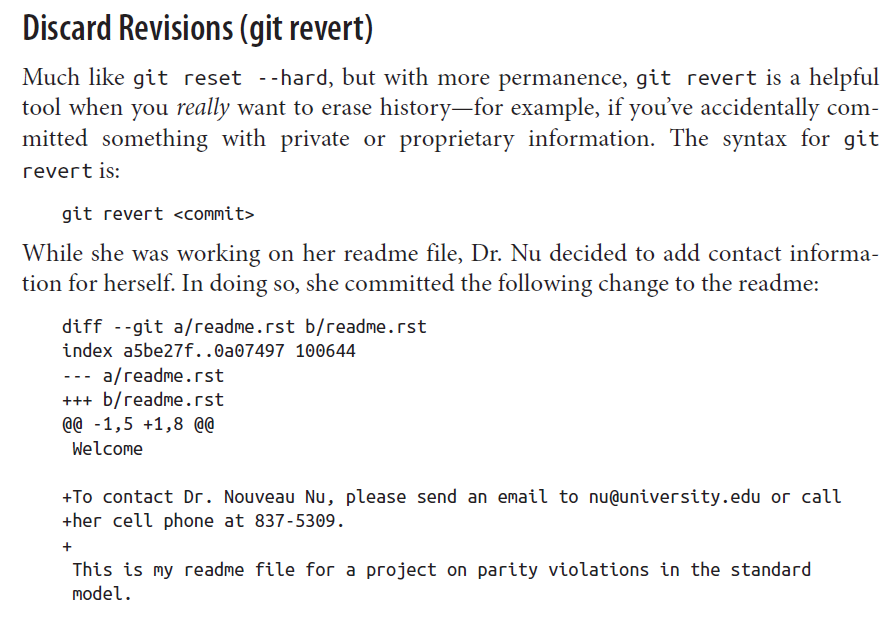

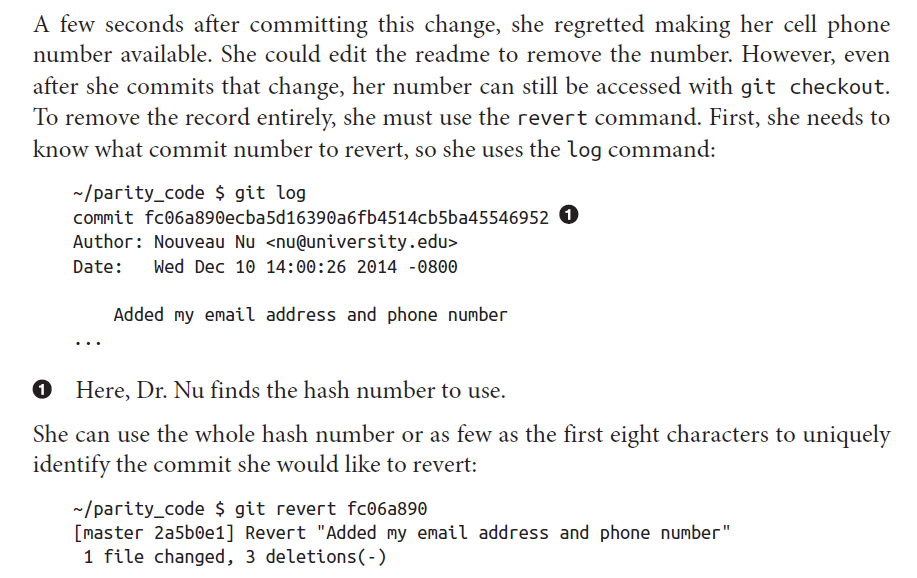

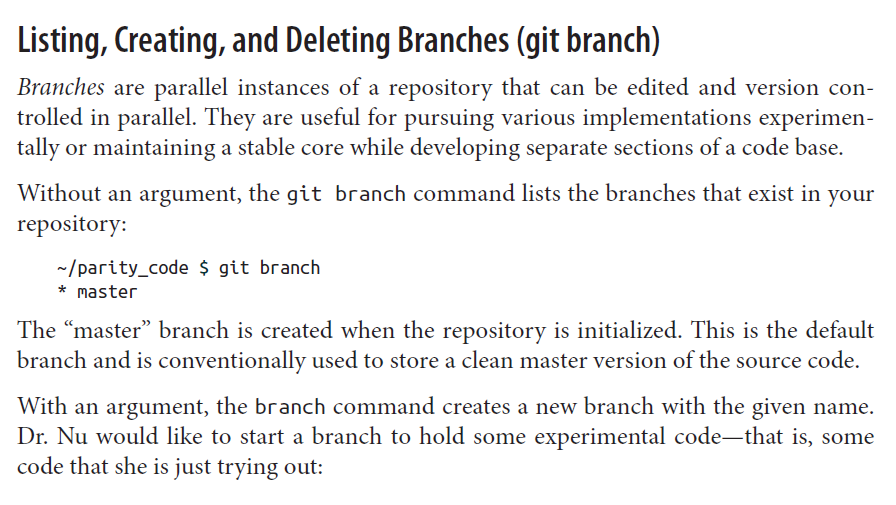

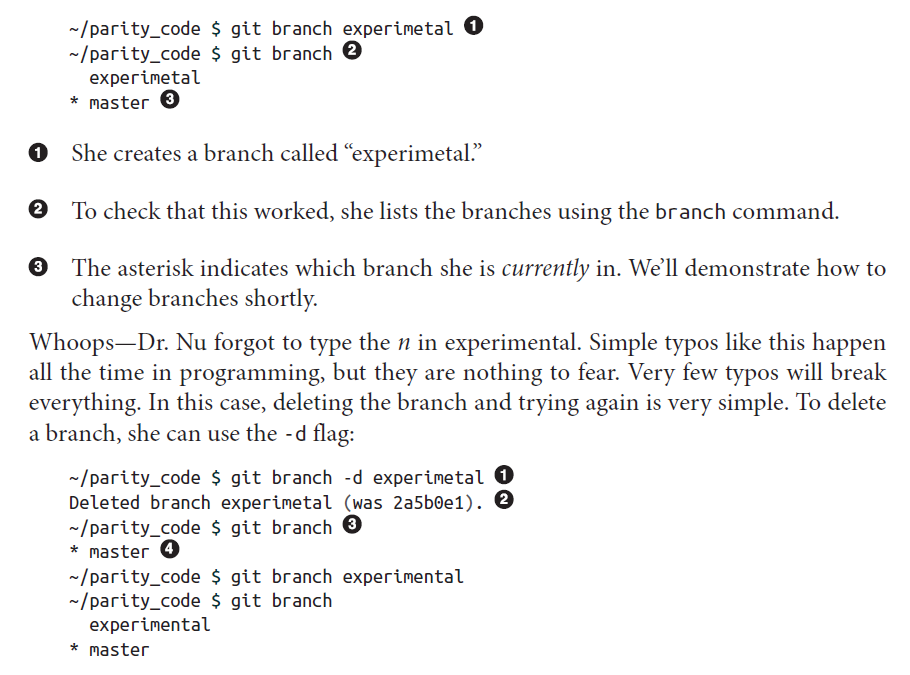

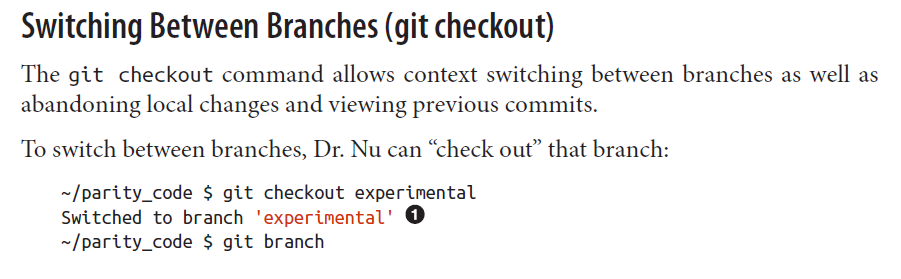

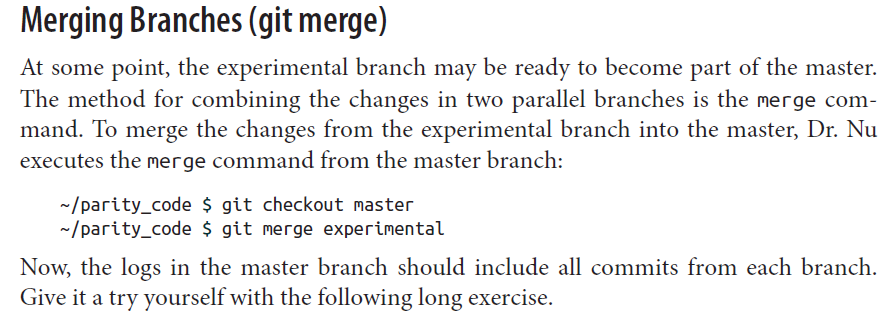

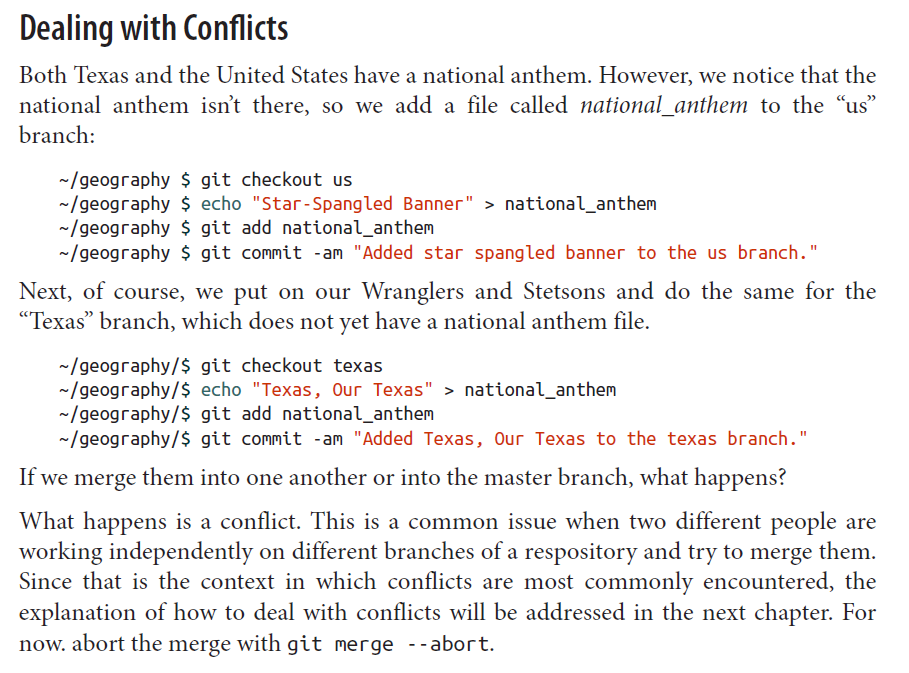